## Get all the imports

In [ ]:
import numpy as np
from sklearn.datasets import make_classification, make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
from sklearn.utils import shuffle
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import Perceptron

## Generate Dataset

Data Shape: (1000, 2)


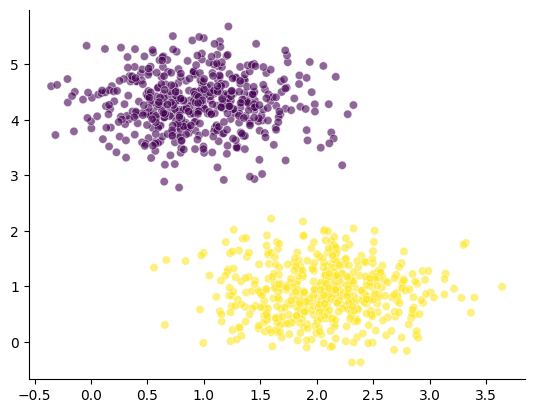

In [ ]:
# Define all the static variables here
seed = 0
num_samples, num_features, num_classes = 1000, 2, 2
class_sep = 2.5

# First create a dataset
X, Y = make_blobs(n_samples=num_samples, centers=2, cluster_std=0.5, random_state=seed)
Y[np.where(Y==0)[0]] = -1
# Check out the shape
print("Data Shape:", X.shape)
# Plot the data
sns.scatterplot(x=X[:,0], y=X[:,1], c=Y, alpha=0.6)
sns.despine()
plt.show()

# Split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

## Define the Perceptron Model

In [ ]:
class CustomPerceptron:
    def __init__(self, num_features:int, lr:float=0.1):
        # Initialize the linear layer
        # Adding one for bias
        # self.W = np.random.normal(0, 0.1, (num_features+1))
        self.W = np.zeros((num_features+1))
        self.lr = lr

    # Define a custom activation function
    def activation_function(self, x):
        out = 1 if x >= 0 else -1
        return out

    # Define a custom objective function
    def loss_fn(self, pred, target):
        return target*pred

    # The forward pass
    def forward(self, x):
        # Add bias to the input
        x = np.append(x, [1])
        out = self.W@x
        out = self.activation_function(out)
        return out

    def weight_update(self, error, input, target):
        if error < 0:
            # Add another column to denote bias
            input = np.append(input, [1])
            self.W = self.W + self.lr * target * input

## Define and train the model

In [ ]:
# Define the learing rate
lr = 0.01

# Define the model
model = CustomPerceptron(X.shape[1], lr)

# Save errors per iteration
misclassification_iter = list()

num_misclassifications = np.inf
epoch = 0
# Perform Training
while num_misclassifications>0:
    num_misclassifications = 0
    for i in tqdm(range(len(X_train))):
        # Get the prediction
        pred = model.forward(X_train[i])
        # Calculate the error
        error = model.loss_fn(pred, Y_train[i])
        num_misclassifications+= 1 if error < 0 else 0
        # Update the weights
        model.weight_update(error, X_train[i], Y_train[i])
    misclassification_iter.append(num_misclassifications)
    epoch  += 1
    print("Number of Misclassifications in iteration", epoch+1, ":", num_misclassifications, "\n\n")

  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 2 : 12 




  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 3 : 3 




  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 4 : 3 




  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 5 : 2 




  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 6 : 3 




  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 7 : 2 




  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 8 : 3 




  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 9 : 2 




  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 10 : 3 




  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 11 : 2 




  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 12 : 3 




  0%|          | 0/800 [00:00<?, ?it/s]

Number of Misclassifications in iteration 13 : 0 




## Let's visualize what the number of misclassified samples look like in each epoch

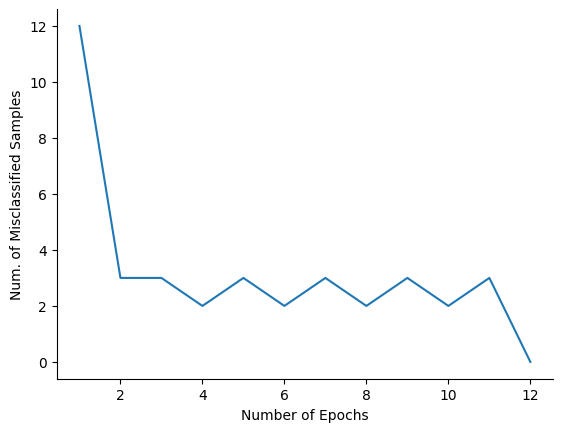

In [ ]:
sns.lineplot(x=np.arange(1, len(misclassification_iter)+1), y=misclassification_iter)
plt.xlabel("Number of Epochs")
plt.ylabel("Num. of Misclassified Samples")
sns.despine()
plt.show()

## Now visualize the decision boundary

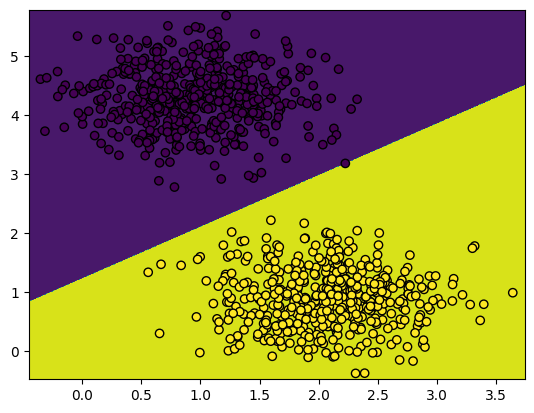

In [ ]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:,0].min()-0.1, X[:, 0].max()+0.1, 500),
    np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1, 500)
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
preds = np.reshape([model.forward(grid[i]) for i in range(len(grid))], feature_1.shape)
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=preds)
display.plot()
display.ax_.scatter(X[:, 0], X[:, 1], c=Y, edgecolor="black")
plt.show()

## Check Accuracy on Test Set with our model

In [ ]:
preds = [model.forward(X_test[i]) for i in range(len(X_test))]
print("Accuracy on Test Set:", accuracy_score(Y_test, preds))

Accuracy on Test Set: 1.0


## Train the sklearn variant and check test set accuracy

In [ ]:
model = Perceptron(eta0=lr, max_iter=num_iters)
model.fit(X_train, Y_train)
preds = model.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(Y_test, preds))

Accuracy on Test Set: 1.0
